 Checking if the steps data has duplicates, or the measurement values coming at same time instants are genuine step values happening all within same 1 minute time period. Also, we will plot heart rate and step on same scale, for same time period. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
import math
# Normalize input dataset before implementing logistic regression: 
from scipy.stats import zscore

In [2]:
HR_26154 = pd.read_csv('26154_HR_.csv')
# sleep_details_26154 = pd.read_csv('26154_sleep_summary.csv')
# aggregate_26154 = pd.read_csv('26154_aggregate.csv')
steps_26154 = pd.read_csv('26154_steps.csv')

In [3]:
steps_26154

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
0,3680682507,2,26154,1,NaN,1,2023-01-27 08:16:00,2023-01-27 08:17:00
1,3685306291,2,26154,1,NaN,1,2023-01-28 19:30:00,2023-01-28 19:31:00
2,3689061214,2,26154,1,NaN,1,2023-01-29 17:54:00,2023-01-29 17:55:00
3,3696745934,2,26154,1,NaN,1,2023-01-31 06:54:00,2023-01-31 06:55:00
4,3701603778,2,26154,1,NaN,1,2023-02-01 06:03:00,2023-02-01 06:04:00
...,...,...,...,...,...,...,...,...
661584,4387615153,20,26154,1,NaN,9650,2023-07-24 00:00:00,2023-07-24 23:59:00
661585,4470144136,20,26154,1,NaN,9695,2023-07-29 00:00:00,2023-07-29 23:59:00
661586,4268457003,20,26154,1,NaN,9781,2023-06-23 00:00:00,2023-06-23 23:59:00
661587,4187439916,20,26154,1,NaN,9819,2023-06-02 00:00:00,2023-06-02 23:59:00


In [4]:
steps_26154['STUDY_METRIC_MSR_START_DT'] = pd.to_datetime(steps_26154['STUDY_METRIC_MSR_START_DT'])
steps_26154['STUDY_METRIC_MSR_END_DT'] = pd.to_datetime(steps_26154['STUDY_METRIC_MSR_END_DT'])
steps_26154.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661589 entries, 0 to 661588
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   STUDY_METRIC_ID            661589 non-null  int64         
 1   STUDY_METRIC_TYP_ID        661589 non-null  int64         
 2   PRTCPT_DVC_ID              661589 non-null  int64         
 3   PRTCPT_DVC_TYP_ID          661589 non-null  int64         
 4   STUDY_METRIC_PRTCPTN_IND   0 non-null       float64       
 5   STUDY_METRIC_MSR_VAL       661589 non-null  int64         
 6   STUDY_METRIC_MSR_START_DT  661589 non-null  datetime64[ns]
 7   STUDY_METRIC_MSR_END_DT    661589 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 40.4 MB


In [5]:
# Dropping the aggregated values of steps, i.e. dropping STUDY_METRIC_TYP_ID == 20 here. 
steps_26154_dropped_agg = steps_26154[steps_26154.STUDY_METRIC_TYP_ID !=20]
steps_26154_dropped_agg.STUDY_METRIC_TYP_ID.unique()


array([2, 4, 5, 6, 7], dtype=int64)

In [6]:
# steps_26154_dropped_agg.STUDY_METRIC_MSR_START_DT.value_counts()

In [7]:
# steps_5_times = pd.DataFrame(columns=steps_26154.columns)
# for val, cnt in steps_26154.STUDY_METRIC_MSR_START_DT.value_counts().items():
#     if (cnt == 5):
#         steps_5_times = pd.concat([steps_5_times, steps_26154[steps_26154['STUDY_METRIC_MSR_START_DT']== val]],ignore_index=True)
#         print('value', val, 'was found', cnt, 'times')

In [8]:
# steps_5_times

In [9]:
# steps_5_times = pd.DataFrame(columns=steps_26154.columns)
# for val, cnt in steps_26154.STUDY_METRIC_MSR_START_DT.value_counts().items():
#     if (cnt == 5):
#         steps_5_times = pd.concat([steps_5_times, steps_26154[steps_26154['STUDY_METRIC_MSR_START_DT']== val]],ignore_index=True)
#         print('value', val, 'was found', cnt, 'times')

# steps_5_times_aggregated = steps_5_times.groupby('STUDY_METRIC_MSR_START_DT')['STUDY_METRIC_MSR_VAL'].sum().reset_index()

In [10]:
# steps_5_times_aggregated

In [11]:
# steps_5_times.columns

In [12]:
# steps_5_times.info()

In [13]:
# steps_5_times.STUDY_METRIC_MSR_START_DT.min()

In [14]:
# steps_5_times.STUDY_METRIC_MSR_START_DT.max()

In [15]:
abcd = steps_26154.STUDY_METRIC_MSR_START_DT.value_counts()
# print(steps_26154.STUDY_METRIC_MSR_START_DT.value_counts().keys())
# steps_26154.STUDY_METRIC_MSR_START_DT.value_counts().index
# abcd
abcd.keys()

DatetimeIndex(['2023-08-22 12:28:00', '2023-08-10 15:39:00',
               '2023-08-08 07:55:00', '2023-08-08 15:15:00',
               '2023-08-08 18:59:00', '2023-08-08 19:45:00',
               '2023-08-09 06:32:00', '2023-08-09 08:04:00',
               '2023-08-09 11:56:00', '2023-08-09 14:05:00',
               ...
               '2023-05-16 09:01:00', '2023-05-16 09:04:00',
               '2023-05-16 09:03:00', '2023-05-16 09:02:00',
               '2023-05-16 09:00:00', '2023-05-16 08:59:00',
               '2023-05-16 09:17:00', '2023-05-16 09:07:00',
               '2023-05-16 09:06:00', '2023-07-11 19:51:00'],
              dtype='datetime64[ns]', name='STUDY_METRIC_MSR_START_DT', length=496549, freq=None)

In [16]:
abcd.keys()[5]

Timestamp('2023-08-08 19:45:00')

In [17]:
steps_26154[steps_26154['STUDY_METRIC_MSR_START_DT']==abcd.keys()[635]]

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
41190,4470217005,2,26154,1,NaN,70,2023-08-09 21:19:00,2023-08-09 21:20:00
41191,4470218592,2,26154,1,NaN,70,2023-08-09 21:19:00,2023-08-09 21:20:00
322829,4453590667,4,26154,1,NaN,1,2023-08-09 21:19:00,2023-08-09 21:20:00
647610,4471386020,5,26154,1,NaN,1,2023-08-09 21:19:00,2023-08-09 21:20:00
647640,4471395072,5,26154,1,NaN,1,2023-08-09 21:19:00,2023-08-09 21:20:00


In [18]:
# steps_5_times_aggregated[steps_5_times_aggregated['STUDY_METRIC_MSR_START_DT']=='2023-08-09 21:19:00']

In [19]:
# 2023-08-31 21:03:00

In [20]:
np.sum(abcd.values == 2)

82202

In [21]:
abcd.values

array([5, 5, 5, ..., 1, 1, 1], dtype=int64)

In [22]:
step_grouped = steps_26154.groupby(['STUDY_METRIC_MSR_START_DT','STUDY_METRIC_TYP_ID']).agg('mean')
step_grouped

STUDY_METRIC_ID  PRTCPT_DVC_ID  \
STUDY_METRIC_MSR_START_DT STUDY_METRIC_TYP_ID                                   
2023-01-20 00:00:00       4                       3.653688e+09        26154.0   
                          20                      3.651422e+09        26154.0   
2023-01-20 00:01:00       4                       3.653688e+09        26154.0   
2023-01-20 00:02:00       4                       3.653688e+09        26154.0   
2023-01-20 00:03:00       4                       3.653688e+09        26154.0   
...                                                        ...            ...   
2024-01-02 02:20:00       4                       5.091547e+09        26154.0   
2024-01-02 02:21:00       4                       5.091547e+09        26154.0   
2024-01-02 02:22:00       4                       5.091547e+09        26154.0   
2024-01-02 02:23:00       4                       5.091547e+09        26154.0   
2024-01-02 02:24:00       4                       5.091539e+09        26154.0   

                                               PRTCPT_DVC_TYP_ID  \
STUDY_METRIC_MSR_START_DT STUDY_METRIC_TYP_ID                      
2023-01-20 00:00:00       4                                  1.0   
                          20                                 1.0   
2023-01-20 00:01:00       4                                  1.0   
2023-01-20 00:02:00       4                                  1.0   
2023-01-20 00:03:00       4                                  1.0   
...                                                          ...   
2024-01-02 02:20:00       4                                  1.0   
2024-01-02 02:21:00       4                                  1.0   
2024-01-02 02:22:00       4                                  1.0   
2024-01-02 02:23:00       4                                  1.0   
2024-01-02 02:24:00       4                                  1.0   

                                               STUDY_METRIC_PRTCPTN_IND  \
STUDY_METRIC_MSR_START_DT STUDY_METRIC_TYP_ID                             
2023-01-20 00:00:00       4                                         NaN   
                          20                                        NaN   
2023-01-20 00:01:00       4                                         NaN   
2023-01-20 00:02:00       4                                         NaN   
2023-01-20 00:03:00       4                                         NaN   
...                                                                 ...   
2024-01-02 02:20:00       4                                         NaN   
2024-01-02 02:21:00       4                                         NaN   
2024-01-02 02:22:00       4                                         NaN   
2024-01-02 02:23:00       4                                         NaN   
2024-01-02 02:24:00       4                                         NaN   

                                               STUDY_METRIC_MSR_VAL  \
STUDY_METRIC_MSR_START_DT STUDY_METRIC_TYP_ID                         
2023-01-20 00:00:00       4                                     1.0   
                          20                                 1131.0   
2023-01-20 00:01:00       4                                     1.0   
2023-01-20 00:02:00       4                                     1.0   
2023-01-20 00:03:00       4                                     1.0   
...                                                             ...   
2024-01-02 02:20:00       4                                     1.0   
2024-01-02 02:21:00       4                                     1.0   
2024-01-02 02:22:00       4                                     1.0   
2024-01-02 02:23:00       4                                     1.0   
2024-01-02 02:24:00       4                                     1.0   

                                              STUDY_METRIC_MSR_END_DT  
STUDY_METRIC_MSR_START_DT STUDY_METRIC_TYP_ID                          
2023-01-20 00:00:00       4                       2023-01-20 00:

In [23]:
step_grouped.columns

Index(['STUDY_METRIC_ID', 'PRTCPT_DVC_ID', 'PRTCPT_DVC_TYP_ID',
       'STUDY_METRIC_PRTCPTN_IND', 'STUDY_METRIC_MSR_VAL',
       'STUDY_METRIC_MSR_END_DT'],
      dtype='object')

In [24]:
len(steps_26154.STUDY_METRIC_MSR_START_DT.unique())

496549

In [25]:
steps_26154.describe(include='all')

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
count,6.615890e+05,661589.000000,661589.0,661589.0,0.0,661589.000000,661589,661589
mean,4.394850e+09,3.960813,26154.0,1.0,NaN,5.054847,2023-07-22 14:20:53.095894784,2023-07-22 14:22:18.787313152
min,3.651422e+09,2.000000,26154.0,1.0,NaN,1.000000,2023-01-20 00:00:00,2023-01-20 00:01:00
25%,4.058218e+09,4.000000,26154.0,1.0,NaN,1.000000,2023-04-30 03:59:00,2023-04-30 04:00:00
50%,4.383976e+09,4.000000,26154.0,1.0,NaN,1.000000,2023-07-22 09:16:00,2023-07-22 09:17:00
75%,4.774930e+09,4.000000,26154.0,1.0,NaN,1.000000,2023-10-27 08:28:00,2023-10-27 08:29:00
max,5.091554e+09,20.000000,26154.0,1.0,NaN,22133.000000,2024-01-02 02:24:00,2024-01-02 02:25:00
std,4.152866e+08,0.723110,0.0,0.0,NaN,120.293748,NaN,NaN


In [26]:
check1 = steps_26154[steps_26154.STUDY_METRIC_MSR_START_DT =='2023-08-09 14:05:00']
check1

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
22185,4470216195,2,26154,1,NaN,25,2023-08-09 14:05:00,2023-08-09 14:06:00
22186,4470217956,2,26154,1,NaN,25,2023-08-09 14:05:00,2023-08-09 14:06:00
322399,4453581864,4,26154,1,NaN,1,2023-08-09 14:05:00,2023-08-09 14:06:00
647287,4471368396,5,26154,1,NaN,1,2023-08-09 14:05:00,2023-08-09 14:06:00
647296,4471377208,5,26154,1,NaN,1,2023-08-09 14:05:00,2023-08-09 14:06:00


In [27]:
steps_26154.info()
# type(steps_26154.STUDY_METRIC_MSR_START_DT[9])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661589 entries, 0 to 661588
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   STUDY_METRIC_ID            661589 non-null  int64         
 1   STUDY_METRIC_TYP_ID        661589 non-null  int64         
 2   PRTCPT_DVC_ID              661589 non-null  int64         
 3   PRTCPT_DVC_TYP_ID          661589 non-null  int64         
 4   STUDY_METRIC_PRTCPTN_IND   0 non-null       float64       
 5   STUDY_METRIC_MSR_VAL       661589 non-null  int64         
 6   STUDY_METRIC_MSR_START_DT  661589 non-null  datetime64[ns]
 7   STUDY_METRIC_MSR_END_DT    661589 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 40.4 MB


In [28]:
# steps_26154.groupby(['STUDY_METRIC_MSR_START_DT','STUDY_METRIC_TYP_ID']).head(10)

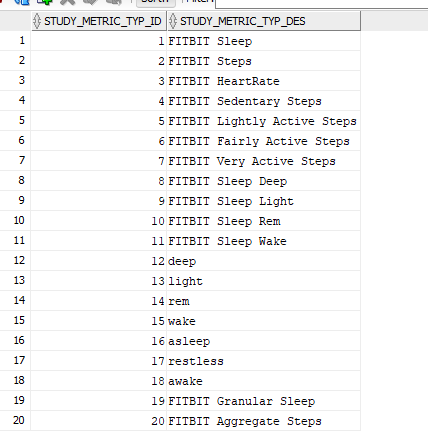

2 - Fitbit steps
4- sedentary steps
5- fitbit lightly active steps
6 - fitbit fairly active steps
7 - fitibt very active steps

In [29]:
# steps_grouped = steps_26154.groupby(['STUDY_METRIC_MSR_START_DT'])
# step_grouped

In [30]:
# step_grouped.loc['2023-01-20 00:00:00']
step_grouped.loc['2023-08-08 07:55:00']

,STUDY_METRIC_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_END_DT
STUDY_METRIC_TYP_ID,,,,,,
2,4.470216e+09,26154.0,1.0,NaN,25.0,2023-08-08 07:56:00
4,4.450112e+09,26154.0,1.0,NaN,1.0,2023-08-08 07:56:00
5,4.471346e+09,26154.0,1.0,NaN,1.0,2023-08-08 07:56:00


In [31]:
steps_26154[steps_26154['STUDY_METRIC_MSR_START_DT']=='2023-08-08 07:55:00']

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
22171,4470215288,2,26154,1,NaN,25,2023-08-08 07:55:00,2023-08-08 07:56:00
22172,4470217099,2,26154,1,NaN,25,2023-08-08 07:55:00,2023-08-08 07:56:00
320576,4450111607,4,26154,1,NaN,1,2023-08-08 07:55:00,2023-08-08 07:56:00
646777,4471337807,5,26154,1,NaN,1,2023-08-08 07:55:00,2023-08-08 07:56:00
646779,4471354925,5,26154,1,NaN,1,2023-08-08 07:55:00,2023-08-08 07:56:00


Summing up all the steps data at one given time instant. Then we can plot it according to time index for a given day. May be then plot it for the entire time period for this student. 

Find heart rate values between 6 pm and 10 pm. Break it down into vectors of means of 10 minute values (just drop the NAs). We can implement a predictive algorithm of deep sleep etc. 

In [32]:
steps_time_aggregated = steps_26154_dropped_agg.groupby('STUDY_METRIC_MSR_START_DT')['STUDY_METRIC_MSR_VAL'].sum().reset_index()
steps_time_aggregated

,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_VAL
0,2023-01-20 00:00:00,1
1,2023-01-20 00:01:00,1
2,2023-01-20 00:02:00,1
3,2023-01-20 00:03:00,1
4,2023-01-20 00:04:00,1
...,...,...
496544,2024-01-02 02:20:00,2
496545,2024-01-02 02:21:00,2
496546,2024-01-02 02:22:00,2
496547,2024-01-02 02:23:00,2


In [33]:
steps_time_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496549 entries, 0 to 496548
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   STUDY_METRIC_MSR_START_DT  496549 non-null  datetime64[ns]
 1   STUDY_METRIC_MSR_VAL       496549 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.6 MB


In [34]:
steps_time_aggregated.STUDY_METRIC_MSR_VAL.max()

287

In [35]:
steps_time_aggregated[steps_time_aggregated.STUDY_METRIC_MSR_VAL == 287]

,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_VAL
288504,2023-08-08 08:24:00,287


In [36]:
steps_26154[steps_26154.STUDY_METRIC_MSR_START_DT=='2023-08-08 08:24:00']

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
11827,4470215315,2,26154,1,NaN,142,2023-08-08 08:24:00,2023-08-08 08:25:00
11828,4470217187,2,26154,1,NaN,142,2023-08-08 08:24:00,2023-08-08 08:25:00
320608,4450111818,4,26154,1,NaN,1,2023-08-08 08:24:00,2023-08-08 08:25:00
646794,4471338040,5,26154,1,NaN,1,2023-08-08 08:24:00,2023-08-08 08:25:00
646796,4471355322,5,26154,1,NaN,1,2023-08-08 08:24:00,2023-08-08 08:25:00


In [37]:
np.size(steps_26154.STUDY_METRIC_MSR_START_DT.unique())

496549

In [38]:
# plt.figure(figsize=(10,7))
# plt.scatter(steps_time_aggregated['STUDY_METRIC_MSR_START_DT'], steps_time_aggregated['STUDY_METRIC_MSR_VAL']) 
# plt.title('steps per minute for entire study period')
# plt.xlabel('time')
# plt.ylabel('steps per minute')
# plt.legend('#steps')
# plt.show()

Based on the figure above, it looks like the step values are duplicate. So I might just have to drop the repeated values at those time instants. 

In [39]:
# Drop the duplicate values of steps measurement at unique time instants instead of adding them. 
steps_time_max_value = steps_26154_dropped_agg.groupby('STUDY_METRIC_MSR_START_DT')['STUDY_METRIC_MSR_VAL'].max().reset_index()
steps_time_max_value

,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_VAL
0,2023-01-20 00:00:00,1
1,2023-01-20 00:01:00,1
2,2023-01-20 00:02:00,1
3,2023-01-20 00:03:00,1
4,2023-01-20 00:04:00,1
...,...,...
496544,2024-01-02 02:20:00,1
496545,2024-01-02 02:21:00,1
496546,2024-01-02 02:22:00,1
496547,2024-01-02 02:23:00,1


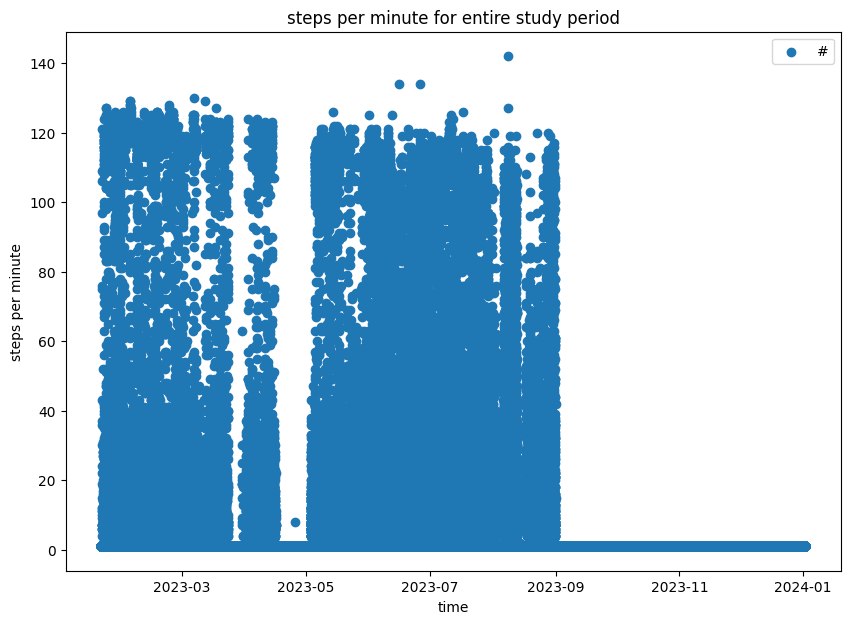

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(steps_time_max_value['STUDY_METRIC_MSR_START_DT'], steps_time_max_value['STUDY_METRIC_MSR_VAL']) 
plt.title('steps per minute for entire study period')
plt.xlabel('time')
plt.ylabel('steps per minute')
plt.legend('#steps')
plt.show()

In [41]:
steps_time_max_value[steps_time_max_value.STUDY_METRIC_MSR_VAL == 142]

,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_VAL
288504,2023-08-08 08:24:00,142


In [42]:
# dir()

In [43]:
steps_time_aggregated[steps_time_aggregated.STUDY_METRIC_MSR_VAL==287]

,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_VAL
288504,2023-08-08 08:24:00,287


In [44]:
steps_26154[steps_26154.STUDY_METRIC_MSR_START_DT=='2023-08-08 08:24:00']

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
11827,4470215315,2,26154,1,NaN,142,2023-08-08 08:24:00,2023-08-08 08:25:00
11828,4470217187,2,26154,1,NaN,142,2023-08-08 08:24:00,2023-08-08 08:25:00
320608,4450111818,4,26154,1,NaN,1,2023-08-08 08:24:00,2023-08-08 08:25:00
646794,4471338040,5,26154,1,NaN,1,2023-08-08 08:24:00,2023-08-08 08:25:00
646796,4471355322,5,26154,1,NaN,1,2023-08-08 08:24:00,2023-08-08 08:25:00


In [45]:
HR_26154.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253230 entries, 0 to 253229
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STUDY_METRIC_ID            253230 non-null  int64  
 1   STUDY_METRIC_TYP_ID        253230 non-null  int64  
 2   PRTCPT_DVC_ID              253230 non-null  int64  
 3   PRTCPT_DVC_TYP_ID          253230 non-null  int64  
 4   STUDY_METRIC_PRTCPTN_IND   0 non-null       float64
 5   STUDY_METRIC_MSR_VAL       253230 non-null  int64  
 6   STUDY_METRIC_MSR_START_DT  253230 non-null  object 
 7   STUDY_METRIC_MSR_END_DT    253230 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 15.5+ MB


In [46]:
HR_26154['MEAS_HR'] = HR_26154['STUDY_METRIC_MSR_VAL']
HR_26154

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT,MEAS_HR
0,1061969481,3,26154,1,NaN,80,2023-01-20 13:47:00,2023-01-20 13:48:00,80
1,1061973375,3,26154,1,NaN,80,2023-01-20 13:48:00,2023-01-20 13:49:00,80
2,1061973376,3,26154,1,NaN,97,2023-01-20 13:49:00,2023-01-20 13:50:00,97
3,1061973377,3,26154,1,NaN,96,2023-01-20 13:50:00,2023-01-20 13:51:00,96
4,1061973378,3,26154,1,NaN,70,2023-01-20 14:11:00,2023-01-20 14:12:00,70
...,...,...,...,...,...,...,...,...,...
253225,1133220357,3,26154,1,NaN,93,2023-08-31 21:04:00,2023-08-31 21:05:00,93
253226,1133220358,3,26154,1,NaN,95,2023-08-31 21:05:00,2023-08-31 21:06:00,95
253227,1133220359,3,26154,1,NaN,124,2023-08-31 21:32:00,2023-08-31 21:33:00,124
253228,1133220759,3,26154,1,NaN,96,2023-09-01 10:24:00,2023-09-01 10:25:00,96


In [47]:
HR_26154=HR_26154.drop('STUDY_METRIC_MSR_VAL',axis=1)

In [48]:
HR_26154 = HR_26154.drop(['STUDY_METRIC_ID','STUDY_METRIC_TYP_ID','PRTCPT_DVC_ID', 'PRTCPT_DVC_TYP_ID', 'STUDY_METRIC_PRTCPTN_IND'],axis = 1)
HR_26154

,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT,MEAS_HR
0,2023-01-20 13:47:00,2023-01-20 13:48:00,80
1,2023-01-20 13:48:00,2023-01-20 13:49:00,80
2,2023-01-20 13:49:00,2023-01-20 13:50:00,97
3,2023-01-20 13:50:00,2023-01-20 13:51:00,96
4,2023-01-20 14:11:00,2023-01-20 14:12:00,70
...,...,...,...
253225,2023-08-31 21:04:00,2023-08-31 21:05:00,93
253226,2023-08-31 21:05:00,2023-08-31 21:06:00,95
253227,2023-08-31 21:32:00,2023-08-31 21:33:00,124
253228,2023-09-01 10:24:00,2023-09-01 10:25:00,96


In [49]:
HR_26154['STUDY_METRIC_MSR_START_DT']=pd.to_datetime(HR_26154['STUDY_METRIC_MSR_START_DT'])
HR_26154.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253230 entries, 0 to 253229
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   STUDY_METRIC_MSR_START_DT  253230 non-null  datetime64[ns]
 1   STUDY_METRIC_MSR_END_DT    253230 non-null  object        
 2   MEAS_HR                    253230 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ MB


In [50]:
merged_HR_steps_on_strt_date = pd.merge(steps_26154,HR_26154, on='STUDY_METRIC_MSR_START_DT', how='inner')
merged_HR_steps_on_strt_date

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT_x,STUDY_METRIC_MSR_END_DT_y,MEAS_HR
0,3680682507,2,26154,1,NaN,1,2023-01-27 08:16:00,2023-01-27 08:17:00,2023-01-27 08:17:00,102
1,3680682507,2,26154,1,NaN,1,2023-01-27 08:16:00,2023-01-27 08:17:00,2023-01-27 08:17:00,102
2,3681158459,5,26154,1,NaN,1,2023-01-27 08:16:00,2023-01-27 08:17:00,2023-01-27 08:17:00,102
3,3681158459,5,26154,1,NaN,1,2023-01-27 08:16:00,2023-01-27 08:17:00,2023-01-27 08:17:00,102
4,3681149911,5,26154,1,NaN,1,2023-01-27 08:16:00,2023-01-27 08:17:00,2023-01-27 08:17:00,102
...,...,...,...,...,...,...,...,...,...,...
347361,4214573187,7,26154,1,NaN,1,2023-06-08 17:22:00,2023-06-08 17:23:00,2023-06-08 17:23:00,145
347362,4214573189,7,26154,1,NaN,1,2023-06-08 17:24:00,2023-06-08 17:25:00,2023-06-08 17:25:00,139
347363,4330194112,7,26154,1,NaN,1,2023-07-08 10:26:00,2023-07-08 10:27:00,2023-07-08 10:27:00,130
347364,4341850694,7,26154,1,NaN,1,2023-07-11 18:51:00,2023-07-11 18:52:00,2023-07-11 18:52:00,139


In [51]:
HR_26154.STUDY_METRIC_MSR_START_DT.value_counts()

STUDY_METRIC_MSR_START_DT
2023-03-14 13:41:00    2
2023-04-05 11:45:00    2
2023-04-05 12:00:00    2
2023-04-05 11:56:00    2
2023-04-05 11:55:00    2
                      ..
2023-04-12 04:18:00    1
2023-04-12 04:19:00    1
2023-04-12 04:20:00    1
2023-04-12 04:21:00    1
2023-09-01 10:25:00    1
Name: count, Length: 224106, dtype: int64

In [52]:
merged_HR_steps_on_strt_date.STUDY_METRIC_MSR_START_DT.value_counts()

STUDY_METRIC_MSR_START_DT
2023-04-13 06:32:00    10
2023-03-16 19:37:00    10
2023-04-13 06:46:00    10
2023-04-13 06:37:00    10
2023-04-12 15:47:00    10
                       ..
2023-04-08 01:27:00     1
2023-04-08 01:28:00     1
2023-04-08 01:30:00     1
2023-04-08 01:31:00     1
2023-07-11 19:51:00     1
Name: count, Length: 224106, dtype: int64

In [53]:
merged_HR_steps_on_strt_date[merged_HR_steps_on_strt_date.STUDY_METRIC_MSR_START_DT =='2023-04-12 15:47:00']

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT_x,STUDY_METRIC_MSR_END_DT_y,MEAS_HR
57217,3994416277,2,26154,1,NaN,25,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57218,3994416277,2,26154,1,NaN,25,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57219,3994416072,2,26154,1,NaN,25,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57220,3994416072,2,26154,1,NaN,25,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57221,3988562419,4,26154,1,NaN,1,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57222,3988562419,4,26154,1,NaN,1,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57223,3994806310,5,26154,1,NaN,1,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57224,3994806310,5,26154,1,NaN,1,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57225,3994801437,5,26154,1,NaN,1,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86
57226,3994801437,5,26154,1,NaN,1,2023-04-12 15:47:00,2023-04-12 15:48:00,2023-04-12 15:48:00,86


In [54]:
dir()

['HR_26154',
 'In',
 'Out',
 '_',
 '_15',
 '_16',
 '_17',
 '_20',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_3',
 '_30',
 '_31',
 '_32',
 '_34',
 '_35',
 '_36',
 '_37',
 '_39',
 '_41',
 '_43',
 '_44',
 '_46',
 '_48',
 '_5',
 '_50',
 '_51',
 '_52',
 '_53',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'abcd',
 'check1',
 'csv',
 'datetime',
 'exit',
 'get_ipython',
 'math',
 'm